In [36]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

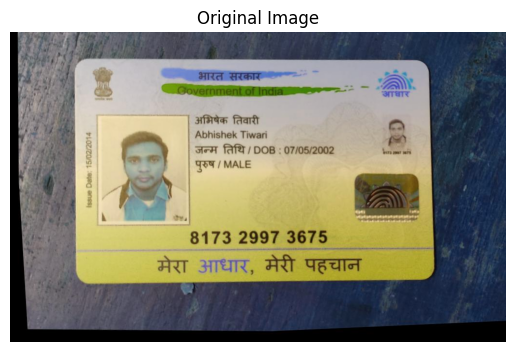

In [37]:
# img = cv.imread(r"C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\data\image_data\adhar_2.jpg")
img = cv.imread(r"C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\data\image_data\id_on_desk.jpg")
plt.figure()
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [13]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#     # Noise reduction
# blur = cv.GaussianBlur(gray_img, (5, 5), 0)

#     # Adaptive thresholding
# thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

#     # Find contours
# contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

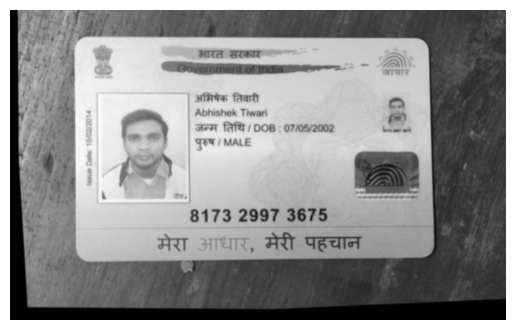

In [14]:
blur = cv.GaussianBlur(gray_img, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.axis("off")
plt.show()

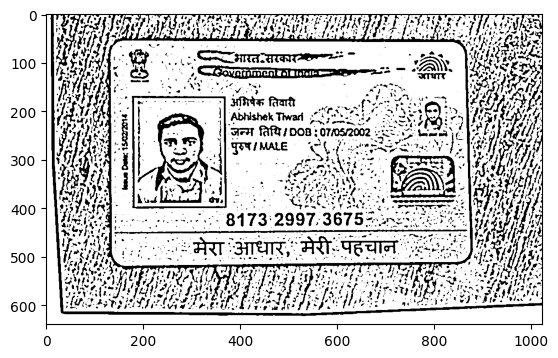

In [15]:
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(thresh, cmap='Greys_r')
plt.show()

contours (133, 54, 743, 466)
Area 335469.0


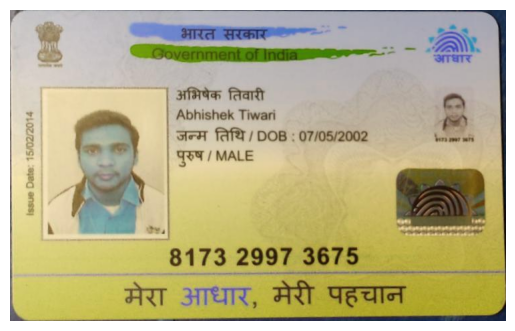

In [16]:
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [17]:
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

    # Get bounding rectangle of the largest contour
x, y, w, h = cv.boundingRect(largest_contour)

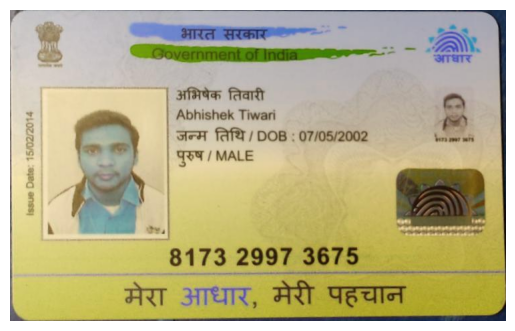

In [18]:
contour_id = img[y:y+h, x:x+w]
plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [19]:
countour_id = r"C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\data\image_data\GIRL_OUTPUT.png"

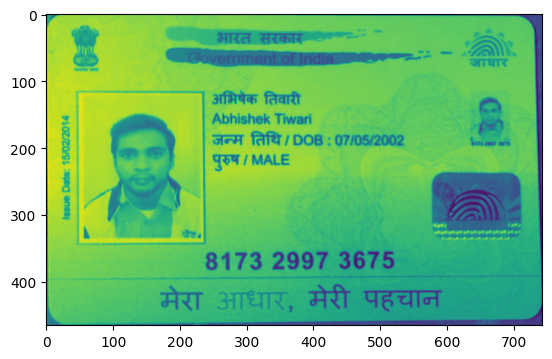

In [20]:
gray_img = cv.cvtColor(contour_id, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [21]:
# gray_img = cv.cvtColor(contour_id, cv.COLOR_BGR2GRAY)

    # Load the Haar cascade classifier
cascade_path = r"C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\data\models\haarcascade_frontalface_default.xml"
face_cascade = cv.CascadeClassifier(cascade_path)

    # Detect faces in the image
# faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [22]:
print(type(face_cascade))

<class 'cv2.CascadeClassifier'>


In [23]:
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=4)

In [24]:
faces

array([[643, 131,  42,  42],
       [ 89, 168, 109, 109]])

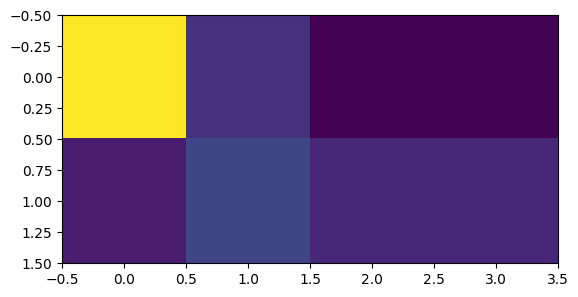

In [25]:
plt.imshow(faces)

In [26]:
max_area = 0
largest_face = None
for (x, y, w, h) in faces:
    area = w * h
    if area > max_area:
        max_area = area
        largest_face = (x, y, w, h)

    # Extract the largest face
if largest_face is not None:
    (x, y, w, h) = largest_face
    # extracted_face = img[y:y+h, x:x+w]
        
    # Increase dimensions by 15%
    new_w = int(w * 1.50)
    new_h = int(h * 1.50)
        
        # Calculate new (x, y) coordinates to keep the center of the face the same
    new_x = max(0, x - int((new_w - w) / 2))
    new_y = max(0, y - int((new_h - h) / 2))

        # Extract the enlarged face
    extracted_face = gray_img[new_y:new_y+new_h, new_x:new_x+new_w]

In [27]:
type(extracted_face)

numpy.ndarray

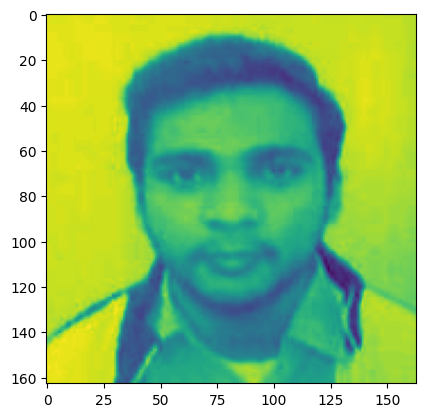

In [28]:
plt.imshow(extracted_face)

In [29]:
os.getcwd()

'c:\\Users\\Naruto\\Desktop\\generative_ai\\deeplearning\\image_processing\\computer_vision\\E_KYC_PROJECT\\notebooks'

In [30]:
import yaml
def read_yaml(path_to_yaml:str) -> dict:
    with open(path_to_yaml) as yaml_file:
        content = yaml.safe_load(yaml_file)
    return content

In [31]:
current_wd = os.getcwd()
config_path = r"C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\config.yaml"
config = read_yaml(config_path)

artifacts = config['artifacts']
cascade_path = artifacts['HAARCASCADE_PATH']
output_path = artifacts['INTERMIDEIATE_DIR']

filename = os.path.join(current_wd, output_path, "extracted_face.jpg")
print(filename)

c:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT\notebooks\data\02_intermediate_data\extracted_face.jpg


In [40]:
# data_string = "|Government of India|HR &|Meera Devi|DOB|05/09/1989|FEMALE|XXXX XXXX XXXX|"
# data_string="|Governmentonindia|Abhishek Tiwari|DOB|07/05/2002|MALE|8|8173 2997 3675|"
data_string="|HRT|INCOME TAX DEPARTMENT|GOVT OF INDIA|Permanent Account Number Card|GJXPM96186|Name|ATHARVA MISHRA|Father' $ Name|DWIJENDRA NATH MISHRA|21112020|Date 6 Binth|15/01/1998|"
updated_data_string = data_string.replace(".", "")
# print(updated_data_string)
words = [word.strip() for word in updated_data_string.split("|") if len(word.strip()) > 2]
print(words)

['HRT', 'INCOME TAX DEPARTMENT', 'GOVT OF INDIA', 'Permanent Account Number Card', 'GJXPM96186', 'Name', 'ATHARVA MISHRA', "Father' $ Name", 'DWIJENDRA NATH MISHRA', '21112020', 'Date 6 Binth', '15/01/1998']


In [ ]:
{'ID': '', 'Name': 'Permanent Account Number Card', "Father's Name": 'GJXPM96186', 'DOB': '', 'ID Type': 'PAN'}

In [33]:
    extracted_info = {
        "ID": "",
        "Name": "",
        "Father's Name": "",
        "DOB": "",
        "ID Type": "PAN"
    }

In [41]:
extracted_info

{'ID': '',
 'Name': 'Government of India',
 "Father's Name": '',
 'DOB': '',
 'ID Type': 'PAN'}

In [34]:
name_index = words.index('Government of India')
print(name_index)
extracted_info["Name"] = words[name_index]
extracted_info

0


{'ID': '',
 'Name': 'Government of India',
 "Father's Name": '',
 'DOB': '',
 'ID Type': 'PAN'}

In [73]:
import sys
sys.path.append(r'C:\Users\Naruto\Desktop\generative_ai\deeplearning\image_processing\computer_vision\E_KYC_PROJECT')

In [74]:
from face_verification import detect_and_extract_face, face_comparison, get_face_embeddings

name_index = words.index('Name') + 1
extracted_info["Name"] = words[name_index]

fathers_name_index = words.index("Father' $ Name") + 1
extracted_info["Father's Name"] = words[fathers_name_index]

id_number_index = words.index('Permanent Account Number Card') + 1
extracted_info["ID"] = words[id_number_index]


extracted_info["EMBEDDING"] = get_face_embeddings(r"C:\Users\Naruto\Downloads\my_pan_image.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'config.yaml'

In [69]:
extracted_info

{'ID': 'GJXPM96186',
 'Name': 'ATHARVA MISHRA',
 "Father's Name": 'DWIJENDRA NATH MISHRA',
 'DOB': datetime.datetime(1998, 1, 15, 0, 0),
 'ID Type': 'PAN'}

In [44]:
from datetime import datetime

In [68]:
dob_index = None
for i, word in enumerate(words):
    try:
        datetime.strptime(word, "%Y/%m/%d")
        dob_index = i
        break
    except ValueError:
        continue

if dob_index is not None:
    extracted_info["DOB"] = datetime.strftime(words[dob_index], "%Y/%m/%d")

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

In [67]:
extracted_info['DOB'].strftime('%Y-%m-%d')

'1998-01-15'

In [46]:
for i, word in enumerate(words):
    print(i,word)

0 HRT
1 INCOME TAX DEPARTMENT
2 GOVT OF INDIA
3 Permanent Account Number Card
4 GJXPM96186
5 Name
6 ATHARVA MISHRA
7 Father' $ Name
8 DWIJENDRA NATH MISHRA
9 21112020
10 Date 6 Binth
11 15/01/1998


In [48]:
datetime.strptime("15/01/1998", "%d/%m/%Y")

datetime.datetime(1998, 1, 15, 0, 0)

In [49]:
import re